# Are F1 Drivers getting younger?
Someone said to me that F1 Drivers today are getting younger, I wasn't convinced so I put this python notebook together which proved they were actually right

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 7.0)


Importing the full list of drivers that took part in the season, also getting the date that the first race of the season took place. This date will be used to calculate there age when the season started. 

In [2]:
r = requests.get(url='http://ergast.com/api/f1/2017/drivers.json')
drivers = r.json()
r = requests.get(url='http://ergast.com/api/f1/2017/1.json')
first_race = r.json()
start_date = np.datetime64(first_race['MRData']['RaceTable']['Races'][0]['date'])

Extracting the date of birth for each of the drivers, and then calculating there age at the first GP of the season. 

In [3]:
print(len(drivers['MRData']['DriverTable']['Drivers']))
driver_ages = np.zeros([len(drivers['MRData']['DriverTable']['Drivers'])])

for x in range(0,len(drivers['MRData']['DriverTable']['Drivers'])):
    driver_DoB = np.datetime64(drivers['MRData']['DriverTable']['Drivers'][x]['dateOfBirth'])
    driver_ages[x] = (start_date-driver_DoB).astype(int)

25


Lets Take a look at the mean, min and max ages of the drivers that have taken part.

In [4]:
print('mean age %2.2f' % np.mean(driver_ages/365))
print('min age %2.2f' % np.min(driver_ages/365))
print('max age %2.2f' % np.max(driver_ages/365))

mean age 27.32
min age 18.42
max age 37.47


A quick histogram to look at how many drivers there are accross the age brackets

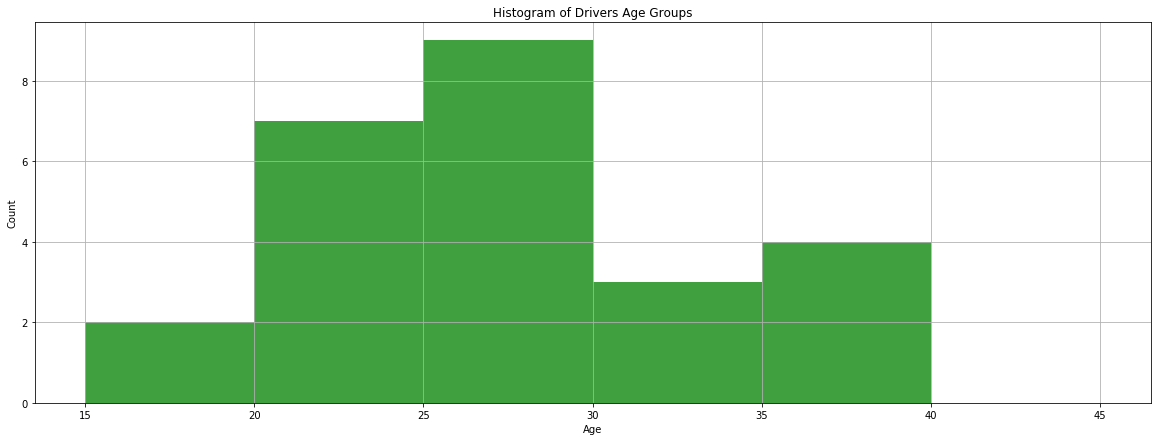

In [5]:
plt.hist(driver_ages/365,range(15,50,5),facecolor='green', alpha=0.75)
plt.title('Histogram of Drivers Age Groups')
plt.ylabel('Count')
plt.xlabel('Age')
plt.grid(True)

Now lets look at how the ages have changed over the years, comparing the min, mean and max ages of the drivers who have taken part durring the season. 

In [6]:
end_year = 2017
look_back = 67
start_year = end_year-look_back

mean_age = np.zeros([look_back])
min_age = np.zeros([look_back])
max_age = np.zeros([look_back])
hist_age = np.zeros([look_back,8])
counter = 0

for year in range(start_year,end_year):
    r = requests.get(url=('http://ergast.com/api/f1/%i/1.json'%year))
    first_race = r.json()
    start_date = np.datetime64(first_race['MRData']['RaceTable']['Races'][0]['date'])
    r = requests.get(url='http://ergast.com/api/f1/%i/drivers.json'%year)
    drivers = r.json()
    num_drivers = len(drivers['MRData']['DriverTable']['Drivers'])
    driver_ages = np.zeros([num_drivers])

    for x in range(0,num_drivers):
        driver_DoB = np.datetime64(drivers['MRData']['DriverTable']['Drivers'][x]['dateOfBirth'])
        driver_ages[x] = (start_date-driver_DoB).astype(int)
        
    mean_age[counter] = np.mean(driver_ages/365)
    min_age[counter] = np.min(driver_ages/365)
    max_age[counter] = np.max(driver_ages/365)
    hist_age[counter],ages = np.histogram(driver_ages/365,range(15,60,5))
    counter = counter + 1

Plot the min, mean and max ages of the drivers throughout the period

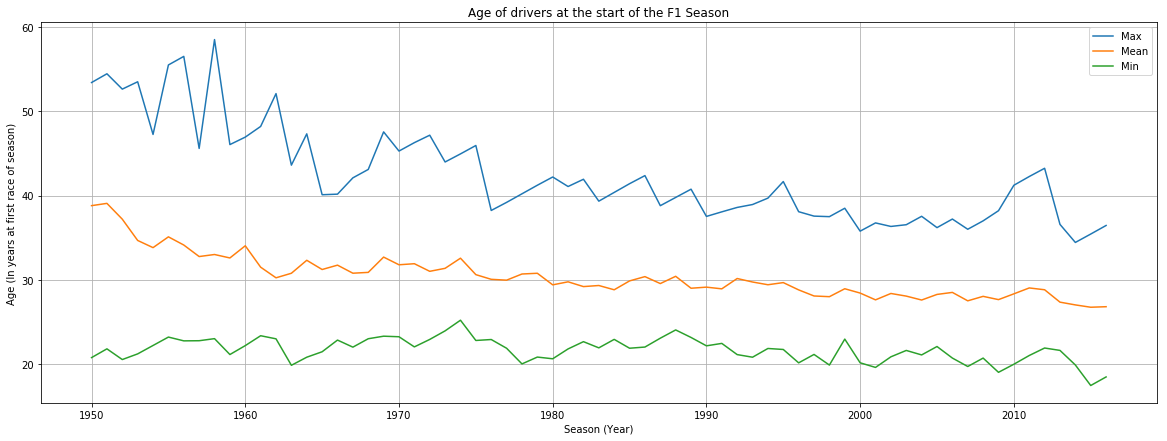

In [7]:
plt.plot(range(start_year,end_year),max_age)
plt.plot(range(start_year,end_year),mean_age)
plt.plot(range(start_year,end_year),min_age)
plt.grid(True)
plt.legend(['Max','Mean','Min'])
plt.xlabel('Season (Year)')
plt.ylabel('Age (In years at first race of season)')
plt.title('Age of drivers at the start of the F1 Season')
plt.show()

From that graph, its clear that over the last 60+ Years that the average age has dropped. The maximum age of the drivers has gradually decreased, with only a handful of seasons in the last 20 years were there was a driver over 40 - Michael Schumacher being the only one who retiered for the second time at the age of 43 in 2012 after making a come back in 2010. 

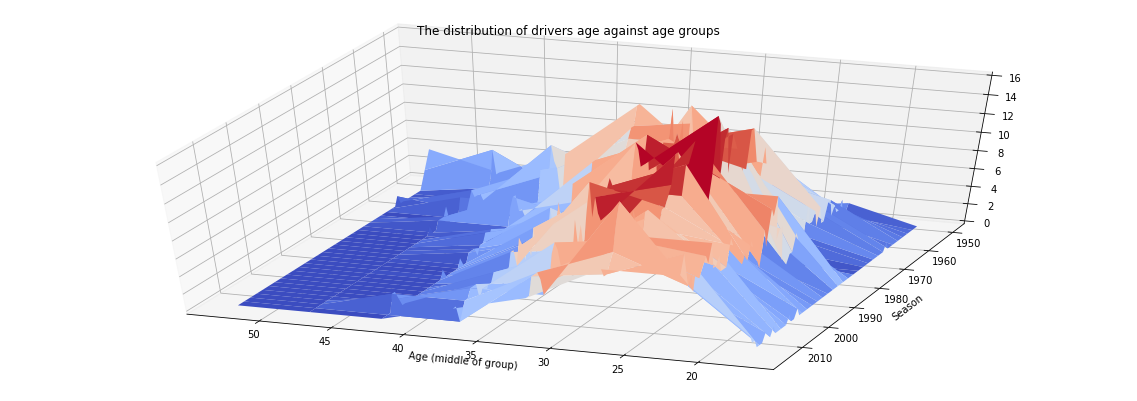

In [8]:
from mpl_toolkits.mplot3d import Axes3D

plotAges = np.zeros(len(ages)-1)
for x in range(0,(len(ages)-1)):
    plotAges[x] = (ages[x]+ages[x+1])/2

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(plotAges,range(start_year,end_year))
ha.plot_surface(X, Y, hist_age,cmap=cm.coolwarm)
ha.view_init(45,110)
plt.title('The distribution of drivers age against age groups')
plt.xlabel('Age (middle of group)')
plt.ylabel('Season')
plt.show()